# Búsqueda y Descubrimiento de Información 
## Laboratorio 1 




Para este laborratorio, utilizaremos una muestra aleatoria de mensajes publicados en Twitter durante las elecciones presidenciales del 2021 ocurridas en Chile. El dataset tiene por nombre ``tweets_elections_sample.csv`` y es un archivo separado por el caracter ``;``. Por lo tanto, cargue el dataset para ser interpretado como dataframe en nuestro entorno de trabajo.


1. Cargue el dataset en un dataframe y muestre las 5 primeras filas.

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
import spacy
import string
from tqdm.auto import tqdm
import csv
import os
import emoji
import matplotlib.pyplot as plt

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
cwd = os.getcwd()

df = pd.read_csv(os.path.join(cwd, "tweets_elections_sample.csv"),
                         sep = ";", 
                         encoding = "utf8",
                         quotechar = "\"") 

In [14]:
df.head(5)

,tweet
0,@ProvosteYasna Otra vez hablando cabezas de pe...
1,"..el ""laucha de supermercado"" buscando cualqui..."
2,Tremendo lienzo! Muchas gracias a todas las co...
3,@RalGuzm17108483 @EValenz11 @joseantoniokast L...
4,@T_Real_Patriots @joseantoniokast #AtreveteCon...


2. Realice un pre-procesamiento de texto que incluya las acciones básicas para dejar el texto lo más limpio posible. Incluya además la eliminación de emojis y emoticones presentes en el texto. Finalmente, muestra las 3 primeras filas del dataset para observar el pre-procesado efectuado. 
**Hint**: utilice las funciones ``convert_emoticons(text)`` y ``convert_emojis(text)`` presentes en el archivo ``preprocessing_tweets.py``. Estas funciones transforman la "imagen" de un emoji en un texto que representa cada una de estas expresiones.

In [21]:
# todo a minúscula.
from preprocessing_tweets import *
df['text_prepro'] = df['tweet'].str.lower()

In [22]:
# eliminamos urls
tqdm.pandas()
df['text_prepro'] = df['text_prepro'].progress_apply(lambda text: remove_mentions_urls(text))

100%|██████████| 5000/5000 [00:00<00:00, 238098.98it/s]


In [26]:
df.head()

,tweet,text_prepro
0,@ProvosteYasna Otra vez hablando cabezas de pe...,otra vez hablando cabezas de pescado que no v...
1,"..el ""laucha de supermercado"" buscando cualqui...","..el ""laucha de supermercado"" buscando cualqui..."
2,Tremendo lienzo! Muchas gracias a todas las co...,tremendo lienzo! muchas gracias a todas las co...
3,@RalGuzm17108483 @EValenz11 @joseantoniokast L...,las ffaa chilenas no son como las venezolan...
4,@T_Real_Patriots @joseantoniokast #AtreveteCon...,#atreveteconkast #atrevidos


In [27]:
df['text_prepro'] = df['text_prepro'].progress_apply(lambda text: convert_emojis(text))

100%|██████████| 5000/5000 [00:00<00:00, 46295.67it/s]


In [28]:
df['text_prepro'] = df['text_prepro'].progress_apply(lambda text: convert_emoticons(text))

100%|██████████| 5000/5000 [00:01<00:00, 4335.64it/s]


In [29]:
# eliminamos hashtags
df['text_prepro'] = df['text_prepro'].progress_apply(lambda text: remove_hts(text))

100%|██████████| 5000/5000 [00:00<00:00, 312452.81it/s]


In [30]:
# eliminamos puntuacion
df['text_prepro'] = df['text_prepro'].progress_apply(lambda text: remove_punctuation(text))

100%|██████████| 5000/5000 [00:00<00:00, 105593.59it/s]


In [31]:
# eliminamos numeros
df['text_prepro'] = df['text_prepro'].progress_apply(lambda text: remove_numbers(text))

100%|██████████| 5000/5000 [00:00<00:00, 277746.40it/s]


In [32]:
# eliminamos tildes
df['text_prepro'] = df['text_prepro'].progress_apply(lambda text: remove_accents(text))

100%|██████████| 5000/5000 [00:00<00:00, 942709.70it/s]


In [33]:
# eliminamos stopwords
stopwords = create_stopwords()
df['text_prepro'] = df['text_prepro'].progress_apply(lambda text: remove_stopwords(text, stopwords))

100%|██████████| 5000/5000 [00:00<00:00, 312517.99it/s]


In [34]:
df['text_prepro'] = df['text_prepro'].progress_apply(lambda text: remove_dots(text))

100%|██████████| 5000/5000 [00:00<00:00, 714288.83it/s]


In [35]:
df.head(3)

,tweet,text_prepro
0,@ProvosteYasna Otra vez hablando cabezas de pe...,hablando cabezas pescado vienen caso preocupat...
1,"..el ""laucha de supermercado"" buscando cualqui...",laucha supermercado buscando recoveco arrancar...
2,Tremendo lienzo! Muchas gracias a todas las co...,tremendo lienzo gracias comunidades exterior n...


3. Vectorice el texto pre-procesado usando unigramas como tokens y la frecuencia de cada uno de estos como pesos.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()  
vects = vect.fit_transform(df.text_prepro)

4. Transforme el vector obtenido en la pregunta anterior, para transformarlo a una matriz de término-documento

In [37]:
# transformamos nuestra matriz sparse a un dataframe
td = pd.DataFrame(vects.todense())
# cada columna es renombrada con el termino del vocabulario
td.columns = vect.get_feature_names()
# transponemos la matriz para generar una de termino-documento
term_document_matrix = td.T
# cada columna, que ahora es un documento, se le da un nombre generico
term_document_matrix.columns = ['Doc'+str(i) for i in range(1, td.shape[0]+1)]

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


5. Grafique los 20 términos con mayor frecuencia ordenados por este valor. Comente 2 observaciones que se desprenden del gráfico

<AxesSubplot:>

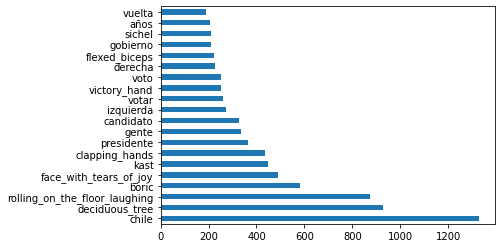

In [43]:
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)

# Print the first 10 rows 

term_document_matrix['total_count'].head(20).plot.barh()

4. Vectorice nuevamente los documentos pero esta vez utilizando bigramas en lugar de unigramas. Observe la documentación de la función ``CountVectorizer()`` (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) para realizar el cambio. Luego repita lo efectuado previamente con unigrama, es decir, obtenga la matriz de término-documento, grafique los top-20 bigramas e indique 2 observaciones de los resultados.

In [39]:
vect2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))  
vects2 = vect2.fit_transform(df.text_prepro)

In [41]:
# transformamos nuestra matriz sparse a un dataframe
td2 = pd.DataFrame(vects2.todense())
# cada columna es renombrada con el termino del vocabulario
td2.columns = vect2.get_feature_names()
# transponemos la matriz para generar una de termino-documento
term_document_matrix2 = td2.T
# cada columna, que ahora es un documento, se le da un nombre generico
term_document_matrix2.columns = ['Doc'+str(i) for i in range(1, td2.shape[0]+1)]

c:\Users\USUARIO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:>

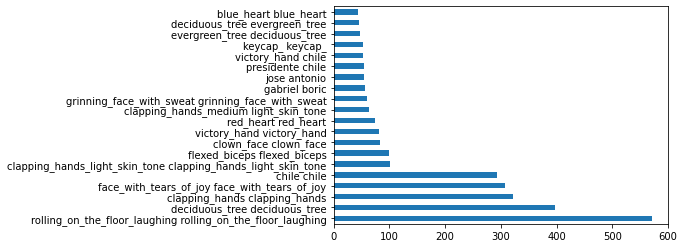

In [44]:
term_document_matrix2['total_count'] = term_document_matrix2.sum(axis=1)

# Top 25 words 
term_document_matrix2 = term_document_matrix2.sort_values(by ='total_count',ascending=False)

# Print the first 10 rows 

term_document_matrix2['total_count'].head(20).plot.barh()

5. Aplique la traspuesta de la matriz término-documento (para obtener la documento-término), estime la similitud de coseno entre documentos y luego realice un heatmap de la matriz de similitud obtenida. Se recomienda ordenar la matriz de similitud para luego graficar. Comente al respecto en base a la matriz graficada.

In [45]:
from sklearn.metrics.pairwise import cosine_similarity

In [47]:
cosine_similarities = cosine_similarity(term_document_matrix2.T)

In [49]:
def argsort_sim_mat(sm):
    idx = [np.argmax(np.sum(sm, axis=1))]  # a
    for i in range(1, len(sm)):
        sm_i = sm[idx[-1]].copy()
        sm_i[idx] = -1
        idx.append(np.argmax(sm_i))  # b
    return np.array(idx)

In [50]:
idx = argsort_sim_mat(cosine_similarities)
sim_mat2 = cosine_similarities[idx, :][:, idx]  # apply reordering for rows and columns

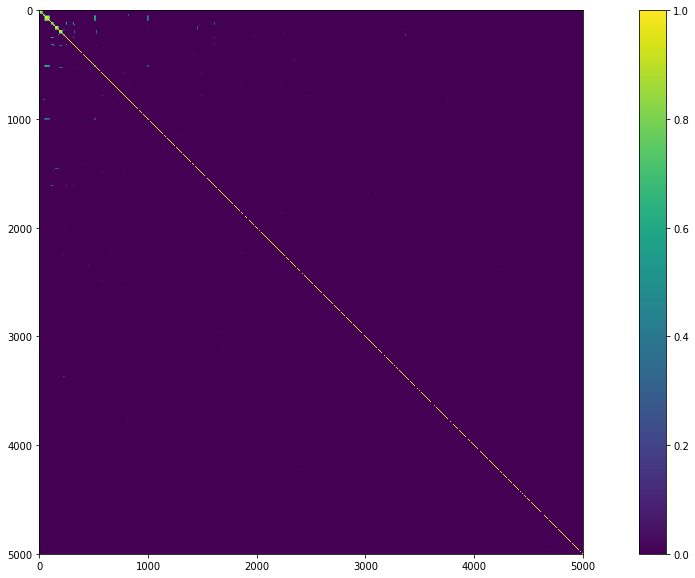

In [51]:
plt.figure(figsize = (20,10))
plt.imshow(sim_mat2, interpolation='none')
plt.colorbar()
plt.show()